In [2]:
import pandas as pd 
import numpy as np
import math
import IPython
import IPython.display
import matplotlib.pyplot as plt
# from kneed import KneeLocator
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from datetime import datetime
import seaborn as sns
import json
from sklearn.neighbors import KNeighborsClassifier


pd.set_option('display.max_columns', None)

In [3]:
with open('../data/block_stats_2022-03-17.json','r') as f:
    data = json.loads(f.read())
df = pd.json_normalize(data,  max_level=1)

In [4]:
print(df.shape)

df.head()

(10000, 29)


,avgfee,avgfeerate,avgtxsize,blockhash,feerate_percentiles,height,ins,maxfee,maxfeerate,maxtxsize,medianfee,mediantime,mediantxsize,minfee,minfeerate,mintxsize,outs,subsidy,swtotal_size,swtotal_weight,swtxs,time,total_out,total_size,total_weight,totalfee,txs,utxo_increase,utxo_size_inc
0,2156,5,682,0000000000000000000a1f8c514e14383378027df9d09e...,"[1, 2, 2, 4, 9]",727609,7981,338130,346,167455,605,1647443684,225,112,1,151,6558,625000000,1470492,3281715,2101,1647445268,3410696965340,1647991,3991711,5204878,2415,-1423,-100026
1,1525,4,549,00000000000000000005b8a11714c19cb7b49eb3441615...,"[2, 3, 3, 4, 5]",727608,7505,193996,272,106374,590,1647442553,225,110,1,151,7022,625000000,1438816,3204862,2557,1647444991,426035824529,1636754,3996614,4541963,2979,-483,-33362
2,6628,9,1424,000000000000000000017c0dc447fcc38e0ff3ec0889dd...,"[4, 4, 7, 7, 9]",727607,7016,597983,349,92187,1160,1647441552,225,330,1,188,4380,625000000,1907606,3642260,1151,1647444782,415981617544,1995027,3991944,9286897,1402,-2636,-191522
3,3873,8,793,00000000000000000005d49059ecd13c5f5cc57d4437c7...,"[4, 4, 5, 7, 10]",727606,6814,439640,269,83200,1100,1647441410,226,192,1,152,7702,625000000,1385134,2994703,1666,1647444350,6435414051194,1634416,3991831,7983917,2062,888,66269
4,2940,6,853,00000000000000000008fc64393f85e314429f6b17d0c9...,"[4, 4, 5, 6, 7]",727605,6588,278748,371,92191,913,1647441286,225,172,1,163,7341,625000000,1676225,3598538,1795,1647443814,680578635895,1774510,3991678,6110328,2079,753,57523


In [5]:
df.drop('blockhash', axis=1, inplace=True)
df.drop('height', axis=1, inplace=True)


# Possible remove subsidy	swtotal_size	swtotal_weight	swtxs as well

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
avgfee,10000.0,4.745865e+03,5.041193e+03,0.000000e+00,2.848000e+03,3.768500e+03,5.282500e+03,2.491460e+05
avgfeerate,10000.0,9.083800e+00,5.860854e+00,0.000000e+00,6.000000e+00,8.000000e+00,1.100000e+01,1.030000e+02
avgtxsize,10000.0,8.733820e+02,1.150998e+03,0.000000e+00,5.250000e+02,6.290000e+02,8.500000e+02,3.422100e+04
ins,10000.0,5.509791e+03,2.458271e+03,0.000000e+00,3.820500e+03,6.524000e+03,7.089000e+03,1.252700e+04
maxfee,10000.0,5.551891e+05,9.261225e+05,0.000000e+00,1.903720e+05,3.490250e+05,5.441050e+05,1.453920e+07
maxfeerate,10000.0,4.215120e+02,4.461408e+02,0.000000e+00,2.690000e+02,3.460000e+02,4.720000e+02,1.495800e+04
maxtxsize,10000.0,8.718041e+04,4.771797e+04,0.000000e+00,5.620675e+04,8.553900e+04,1.027380e+05,2.694390e+05
medianfee,10000.0,1.232633e+03,1.542280e+03,0.000000e+00,6.927500e+02,1.008000e+03,1.487250e+03,1.028120e+05
mediantime,10000.0,1.644473e+09,1.698507e+06,1.641575e+09,1.642983e+09,1.644482e+09,1.645951e+09,1.647444e+09
mediantxsize,10000.0,2.486286e+02,7.424095e+02,0.000000e+00,2.260000e+02,2.260000e+02,2.460000e+02,5.019700e+04


In [7]:
## Apply date transform 
def as_date(ts):
    return(datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))

df.time = pd.to_datetime(df.time.apply(as_date))
df.set_index('time', inplace=True)
df.sort_index(inplace = True)

In [8]:
## Flatten percentiles array
df.feerate_percentiles

time
2022-01-07 12:43:26     [6, 6, 6, 7, 11]
2022-01-07 12:46:34      [6, 6, 6, 6, 9]
2022-01-07 12:52:59     [5, 6, 6, 9, 13]
2022-01-07 12:53:20      [3, 3, 4, 5, 5]
2022-01-07 13:03:02    [6, 6, 9, 11, 21]
                             ...        
2022-03-16 11:16:54      [4, 4, 5, 6, 7]
2022-03-16 11:25:50     [4, 4, 5, 7, 10]
2022-03-16 11:33:02      [4, 4, 7, 7, 9]
2022-03-16 11:36:31      [2, 3, 3, 4, 5]
2022-03-16 11:41:08      [1, 2, 2, 4, 9]
Name: feerate_percentiles, Length: 10000, dtype: object

In [9]:
df['feerate_10_percentiles'] = np.NaN
df['feerate_25_percentiles'] = np.NaN
df['feerate_50_percentiles'] = np.NaN
df['feerate_75_percentiles'] = np.NaN
df['feerate_90_percentiles'] = np.NaN

for index, row in df.iterrows():
    df.loc[index, 'feerate_10_percentiles'] =  row['feerate_percentiles'][0]
    df.loc[index, 'feerate_25_percentiles'] = row['feerate_percentiles'][1]
    df.loc[index, 'feerate_50_percentiles'] = row['feerate_percentiles'][2]
    df.loc[index, 'feerate_75_percentiles'] = row['feerate_percentiles'][3]
    df.loc[index,'feerate_90_percentiles'] = row['feerate_percentiles'][4]

df.drop('feerate_percentiles', axis=1, inplace=True)

In [10]:
# min max median fee rate

In [11]:
labels = df[['minfeerate', 'maxfeerate', 'medianfee', 'avgfeerate', 'total_size']]

In [12]:
labels.head()

,minfeerate,maxfeerate,medianfee,avgfeerate,total_size
time,,,,,
2022-01-07 12:43:26,1,469,1390,17,1456266
2022-01-07 12:46:34,2,302,2060,10,1085443
2022-01-07 12:52:59,1,302,1460,11,1489942
2022-01-07 12:53:20,1,202,769,4,1732400
2022-01-07 13:03:02,1,346,2087,16,1307804


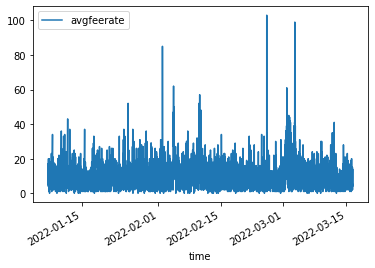

In [13]:
labels.plot(use_index = True, y = 'avgfeerate');

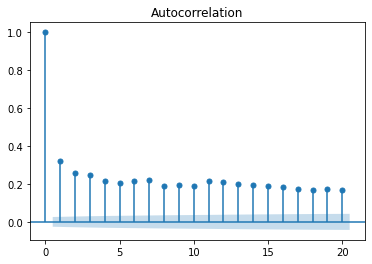

In [14]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(labels['avgfeerate'], lags=20, alpha = 0.01);

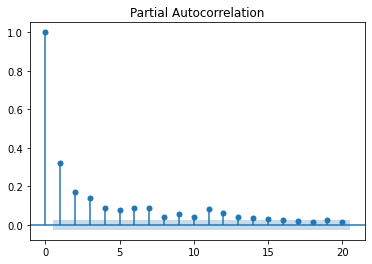

In [15]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(labels['avgfeerate'], lags=20, alpha = 0.01);

In [16]:
# ' "AHHHHHHHHHH" - Grizzly ' - Isaiah 
# Basically this does the same thing as the mempool data, where we resample to a time interval and take the mean values for labels 
# in that interval. I feel like I'm making to many assumptions doing this but my goal is to see how things change over time and its
# easier to do that with evenly spaced time intervals 

# the max time between blocks is ~ 01:44:47, the avg was ~00:09:47, median ~00:06:49, and min was 00:00:00
print(labels.reset_index().time.diff().max())
print(labels.reset_index().time.diff().min())
print(labels.reset_index().time.diff().mean())
print(labels.reset_index().time.diff().median())

data = labels.reset_index().groupby('time').mean().resample('15min').pad().dropna()

0 days 01:44:47
0 days 00:00:00
0 days 00:09:47.204920492
0 days 00:06:49


In [17]:
print(f"The data now has {data.shape[0]} observations")
data.head()

The data now has 6524 observations


,minfeerate,maxfeerate,medianfee,avgfeerate,total_size
time,,,,,
2022-01-07 12:45:00,1.0,469.0,1390.0,17.0,1456266.0
2022-01-07 13:00:00,1.0,202.0,769.0,4.0,1732400.0
2022-01-07 13:15:00,1.0,346.0,2087.0,16.0,1307804.0
2022-01-07 13:30:00,1.0,356.0,2100.0,19.0,1497491.0
2022-01-07 13:45:00,1.0,356.0,2100.0,19.0,1497491.0


In [18]:
# experiment, lets see what results are with resampling and what its like without. I suppose we might not need resampling and that 
# may make more sense in the context of this problem (whats the fee rate in the next 9 min vs whats the fee rate for the next
# block?)

In [19]:
data.rolling(1).mean()

,minfeerate,maxfeerate,medianfee,avgfeerate,total_size
time,,,,,
2022-01-07 12:45:00,1.0,469.0,1390.0,17.0,1456266.0
2022-01-07 13:00:00,1.0,202.0,769.0,4.0,1732400.0
2022-01-07 13:15:00,1.0,346.0,2087.0,16.0,1307804.0
2022-01-07 13:30:00,1.0,356.0,2100.0,19.0,1497491.0
2022-01-07 13:45:00,1.0,356.0,2100.0,19.0,1497491.0
...,...,...,...,...,...
2022-03-16 10:30:00,1.0,2851.0,1153.0,15.0,1530664.0
2022-03-16 10:45:00,0.0,251.0,352.0,2.0,1584002.0
2022-03-16 11:00:00,1.0,474.0,1400.0,12.0,1536905.0


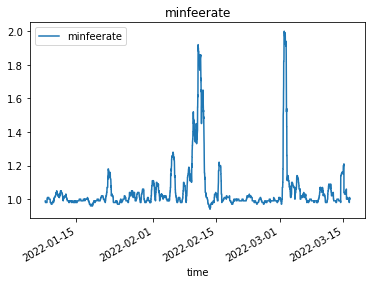

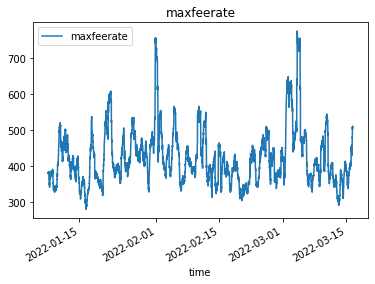

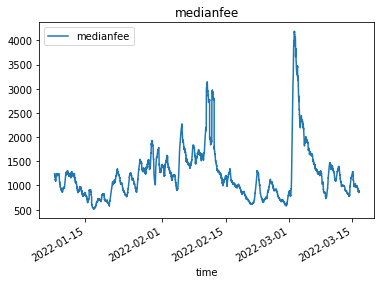

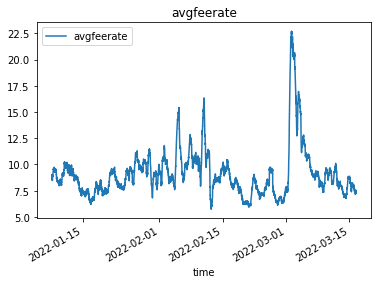

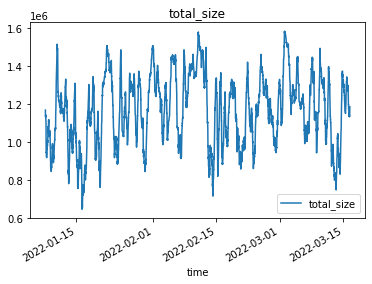

In [20]:
def plot_all(df, rollup_steps = 1):
    new_df = df.rolling(window = rollup_steps).mean()
    for col in new_df.columns:
        new_df.plot(use_index=True, y=col, kind='line', title=col)
plot_all(labels, 100)

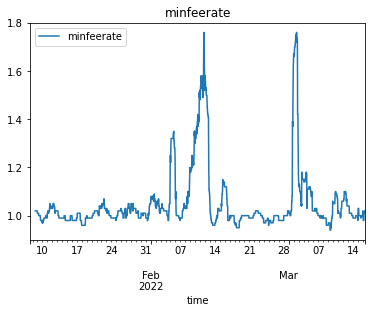

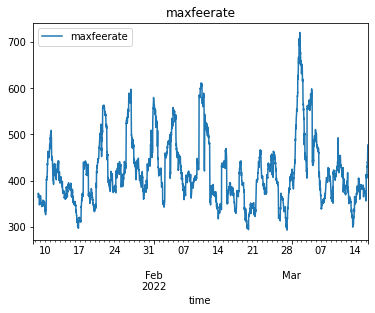

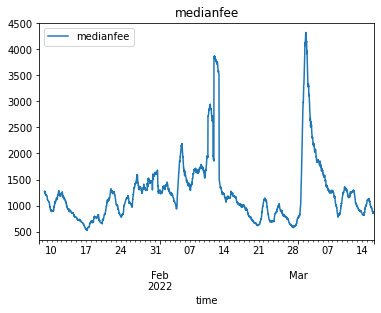

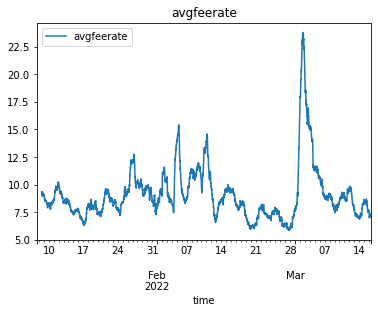

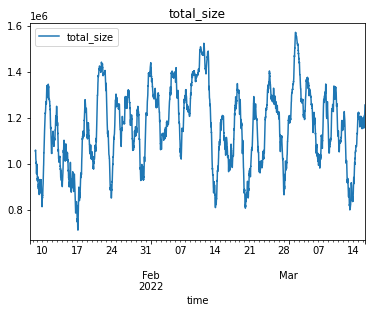

In [21]:
# honestly these look pretty identical, im wondering how much of a difference the resampling actually made lol
plot_all(data, 100)

In [22]:
### normalize with min max
## good practice is to do this after splitting into train test df's - otherwise you're using testing data to normalize your training
## data, which will make your model appear to be doing better than it is

# mean = df.mean()
# std = df.std()
# df_normalized = (df - mean) / std

# df_normalized
data['avgfeerate']

time
2022-01-07 12:45:00    17.0
2022-01-07 13:00:00     4.0
2022-01-07 13:15:00    16.0
2022-01-07 13:30:00    19.0
2022-01-07 13:45:00    19.0
                       ... 
2022-03-16 10:30:00    15.0
2022-03-16 10:45:00     2.0
2022-03-16 11:00:00    12.0
2022-03-16 11:15:00    14.0
2022-03-16 11:30:00     8.0
Freq: 15T, Name: avgfeerate, Length: 6524, dtype: float64

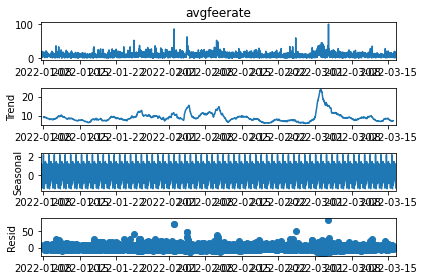

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose time series into trend, seasonal, and residual components.
decomp = seasonal_decompose(data['avgfeerate'], period = 100)

# Plot the decomposed time series.
decomp.plot();

In [24]:
train_df = labels[['avgfeerate']]

for i in range(1,50):
    train_df[f'input_{i}'] = train_df['avgfeerate'].shift(i)

<ipython-input-24-3083ba19bcc1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[f'input_{i}'] = train_df['avgfeerate'].shift(i)


In [25]:
import statsmodels.api as sm
train_df.dropna(inplace = True)

In [26]:
train_df['time'] = range(0, len(train_df))

In [28]:
from sklearn.model_selection import train_test_split
X = train_df.drop(columns = ['avgfeerate'])
y = train_df.avgfeerate

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    shuffle=False)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8955, 50)
(996, 50)
(8955,)
(996,)


In [29]:
X_train = sm.add_constant(X_train)


# Confirm.
X_train.head()

,const,input_1,input_2,input_3,input_4,input_5,input_6,input_7,input_8,input_9,input_10,input_11,input_12,input_13,input_14,input_15,input_16,input_17,input_18,input_19,input_20,input_21,input_22,input_23,input_24,input_25,input_26,input_27,input_28,input_29,input_30,input_31,input_32,input_33,input_34,input_35,input_36,input_37,input_38,input_39,input_40,input_41,input_42,input_43,input_44,input_45,input_46,input_47,input_48,input_49,time
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-01-07 20:09:18,1.0,17.0,7.0,7.0,0.0,12.0,8.0,12.0,4.0,2.0,8.0,18.0,10.0,7.0,8.0,7.0,7.0,7.0,15.0,20.0,5.0,1.0,1.0,10.0,2.0,5.0,1.0,2.0,4.0,11.0,15.0,3.0,6.0,10.0,12.0,4.0,14.0,9.0,9.0,5.0,6.0,6.0,15.0,20.0,19.0,16.0,4.0,11.0,10.0,17.0,0
2022-01-07 20:13:36,1.0,12.0,17.0,7.0,7.0,0.0,12.0,8.0,12.0,4.0,2.0,8.0,18.0,10.0,7.0,8.0,7.0,7.0,7.0,15.0,20.0,5.0,1.0,1.0,10.0,2.0,5.0,1.0,2.0,4.0,11.0,15.0,3.0,6.0,10.0,12.0,4.0,14.0,9.0,9.0,5.0,6.0,6.0,15.0,20.0,19.0,16.0,4.0,11.0,10.0,1
2022-01-07 20:30:34,1.0,6.0,12.0,17.0,7.0,7.0,0.0,12.0,8.0,12.0,4.0,2.0,8.0,18.0,10.0,7.0,8.0,7.0,7.0,7.0,15.0,20.0,5.0,1.0,1.0,10.0,2.0,5.0,1.0,2.0,4.0,11.0,15.0,3.0,6.0,10.0,12.0,4.0,14.0,9.0,9.0,5.0,6.0,6.0,15.0,20.0,19.0,16.0,4.0,11.0,2
2022-01-07 20:46:43,1.0,10.0,6.0,12.0,17.0,7.0,7.0,0.0,12.0,8.0,12.0,4.0,2.0,8.0,18.0,10.0,7.0,8.0,7.0,7.0,7.0,15.0,20.0,5.0,1.0,1.0,10.0,2.0,5.0,1.0,2.0,4.0,11.0,15.0,3.0,6.0,10.0,12.0,4.0,14.0,9.0,9.0,5.0,6.0,6.0,15.0,20.0,19.0,16.0,4.0,3
2022-01-07 20:58:37,1.0,9.0,10.0,6.0,12.0,17.0,7.0,7.0,0.0,12.0,8.0,12.0,4.0,2.0,8.0,18.0,10.0,7.0,8.0,7.0,7.0,7.0,15.0,20.0,5.0,1.0,1.0,10.0,2.0,5.0,1.0,2.0,4.0,11.0,15.0,3.0,6.0,10.0,12.0,4.0,14.0,9.0,9.0,5.0,6.0,6.0,15.0,20.0,19.0,16.0,4


In [30]:
lm = sm.OLS(y_train, X_train)

lm_results = lm.fit()

In [31]:
X_test = sm.add_constant(X_test)

In [32]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
preds = []
for _ in range(len(y_test)):
    preds.append(y_train.mean())
print(r2_score(y_test, preds))

r2_score(y_test, lm_results.predict(X_test))

-0.057735693515630127


0.001883806325088666

In [33]:
print(mean_squared_error(y_test, preds))
mean_squared_error(y_test, lm_results.predict(X_test))

18.804491855304708


17.744572627802935

In [34]:
print(mean_absolute_error(y_test, preds))

mean_absolute_error(y_test, lm_results.predict(X_test))

# Better than the baseline :) lol

3.263244266849643


3.018563779394582

<AxesSubplot:xlabel='time'>

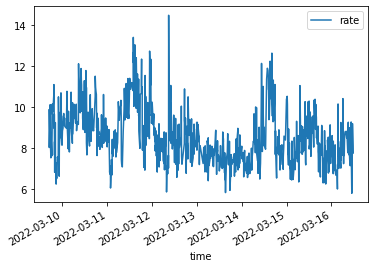

In [35]:
pd.DataFrame(lm_results.predict(X_test), columns = ['rate']).plot(use_index = True, y = 'rate')

<AxesSubplot:xlabel='time'>

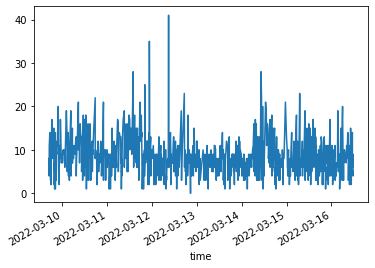

In [36]:
y_test.plot(use_index = True)

In [37]:
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def model_lm(df, col = None, shift = None):
    train_df = df[[col]]

    for i in range(1,shift):
        train_df[f'input_{i}'] = train_df[col].shift(i)
    train_df.dropna(inplace = True)
    train_df['time'] = range(0, len(train_df))
    X = train_df.drop(columns = [col])
    y = train_df[col]

    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size = 0.1,
                                                        shuffle=False)
    X_train = sm.add_constant(X_train)
    
    lm = sm.OLS(y_train, X_train)

    lm_results = lm.fit()
    
    X_test = sm.add_constant(X_test)
    
    preds = []
    for _ in range(len(y_test)):
        preds.append(y_train.mean())
    print('r2_score') 
    print(f"baseline: {r2_score(y_test, preds)}")
    print(f"model: {r2_score(y_test, lm_results.predict(X_test))}")

    
    print('mean_absolute_error') 
    print(f"baseline: {mean_absolute_error(y_test, preds)}")
    print(f"model: {mean_absolute_error(y_test, lm_results.predict(X_test))}")
    
    print('mean_squared_error') 
    print(f"baseline: {mean_squared_error(y_test, preds)}")
    print(f"model: {mean_squared_error(y_test, lm_results.predict(X_test))}")

In [38]:
for name in labels.columns:
    print(name)
    model_lm(labels, col = name, shift = 50)

minfeerate


<ipython-input-37-86df53321067>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[f'input_{i}'] = train_df[col].shift(i)


r2_score
baseline: -0.0009520045964259705
model: -0.11350007574916643
mean_absolute_error
baseline: 0.10955603542029649
model: 0.14160830201680316
mean_squared_error
baseline: 0.3244444799015051
model: 0.36092535035422096
maxfeerate


<ipython-input-37-86df53321067>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[f'input_{i}'] = train_df[col].shift(i)


r2_score
baseline: -0.0051074920651563716
model: -0.022169215559322275
mean_absolute_error
baseline: 195.827557578163
model: 196.05957060544276
mean_squared_error
baseline: 144592.69580380016
model: 147047.1602412422
medianfee
r2_score


<ipython-input-37-86df53321067>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[f'input_{i}'] = train_df[col].shift(i)
<ipython-input-37-86df53321067>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[f'input_{i}'] = train_df[col].shift(i)


baseline: -0.0942945617821831
model: 0.08141754163831838
mean_absolute_error
baseline: 407.74965691913377
model: 313.23634646235433
mean_squared_error
baseline: 337494.6330869388
model: 283302.74185039965
avgfeerate
r2_score
baseline: -0.057735693515630127
model: 0.001883806325088666
mean_absolute_error
baseline: 3.263244266849643
model: 3.018563779394582
mean_squared_error
baseline: 18.804491855304708
model: 17.744572627802935
total_size


<ipython-input-37-86df53321067>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[f'input_{i}'] = train_df[col].shift(i)


r2_score
baseline: -0.006509591028927231
model: 0.27902686589629955
mean_absolute_error
baseline: 439023.0900173558
model: 340479.14941697434
mean_squared_error
baseline: 272606684173.3961
model: 195270961367.7813
